In [1]:
#Pull in Data
import pandas as pd
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Master_Data_Table.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

/Users/jamesfay/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,lat,long,yr_of_last_update,season_sold,below_ground_ratio,price_100k
0,7129300520,3,1.00,1180,5650,1.0,0.0,3,7,98178,47.5112,-122.257,1955,Fall,0.000000,2.219
1,6414100192,3,2.25,2570,7242,2.0,0.0,3,7,98125,47.7210,-122.319,1991,Winter,0.184332,5.380
2,5631500400,2,1.00,770,10000,1.0,0.0,3,6,98028,47.7379,-122.233,1933,Winter,0.000000,1.800
3,2487200875,4,3.00,1960,5000,1.0,0.0,5,7,98136,47.5208,-122.393,1965,Winter,0.866667,6.040
4,1954400510,3,2.00,1680,8080,1.0,0.0,3,8,98074,47.6168,-122.045,1987,Winter,0.000000,5.100


In [2]:
df.shape

(21374, 16)

## Check Linearity Assumption

In [3]:
def linearity_test(df):
    y = df['price_100k']
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
    for n in range(len(df.columns) - 1):
        row = (n-1)//3
        col = n%3-1
        ax = axes[row][col]
        column = df.columns[n]
        x = df[column]
        ax.scatter(x,y)
        ax.set_title(str(column) + ' vs Price')

In [4]:
#Create df with only variables we could use in regression.  Create log_lot variable
reg_df = df.drop(['zipcode', 'lat', 'long', 'id'], axis=1)
log_lot_col = np.log(reg_df['sqft_lot'])
reg_df.insert(loc=0, column='log_lot', value=log_lot_col)

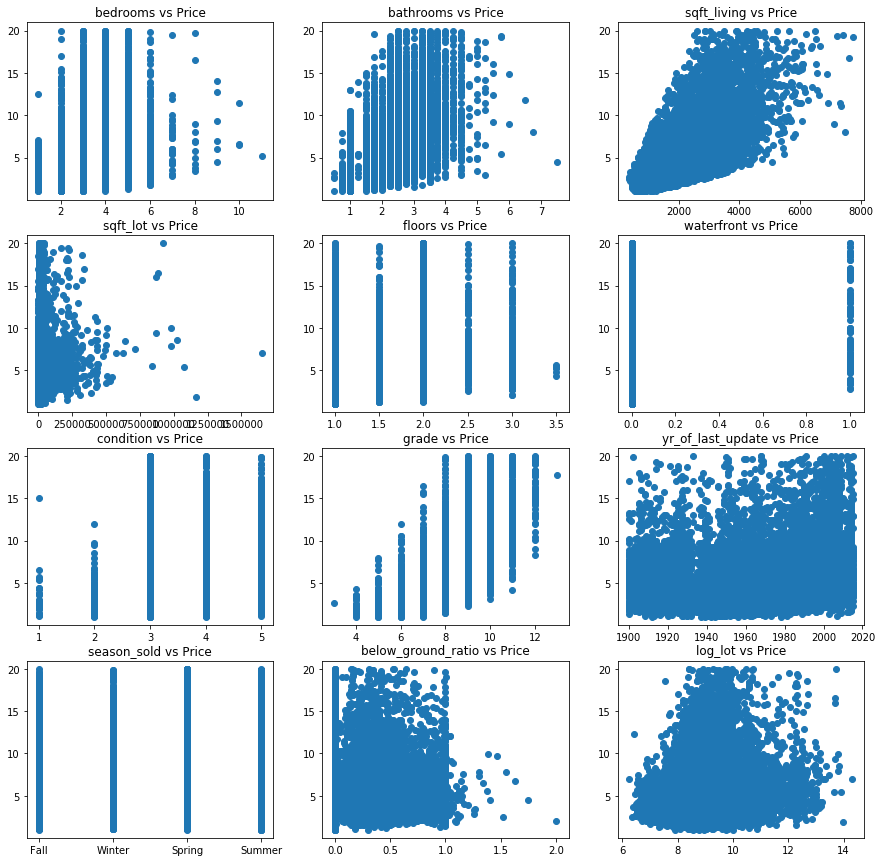

In [5]:
linearity_test(reg_df)

## Plot Histograms

In [7]:
def plot_histograms(df):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
    for n in range(len(df.columns) - 1):
        row = (n-1)//3
        col = n%3-1
        ax = axes[row][col]
        column = df.columns[n]
        x = df[column]
        ax.hist(x)
        ax.set_title(str(column))
        

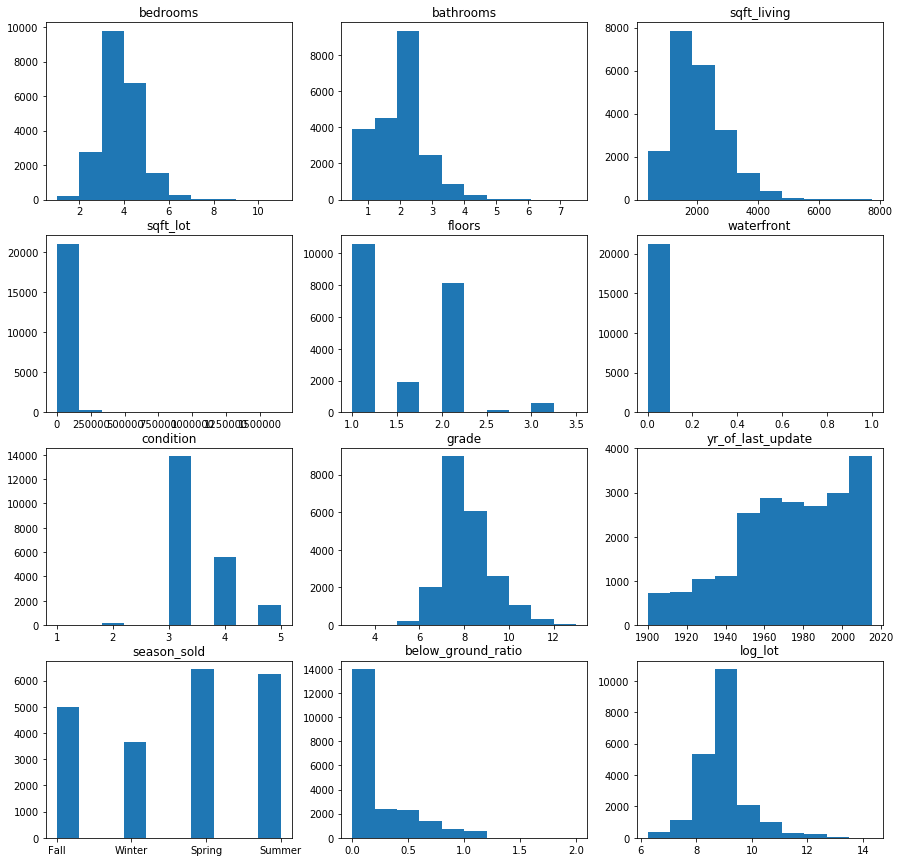

In [8]:
plot_histograms(reg_df)

## Check For Multicollinearity

In [9]:
def check_multicollinearity(df, independent_var_name, cutoff):
    copy_df = df.drop(independent_var_name, axis=1)
    # copy_df = reg_df

    # save absolute value of correlation matrix as a data frame
    # converts all values to absolute value
    # stacks the row:column pairs into a multindex
    # reset the index to set the multindex to seperate columns
    # sort values. 0 is the column automatically generated by the stacking

    pair_df=copy_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    # zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
    pair_df['pairs'] = list(zip(pair_df.level_0, pair_df.level_1))

    # set index to pairs
    pair_df.set_index(['pairs'], inplace = True)

    #drop level columns
    pair_df.drop(columns=['level_1', 'level_0'], inplace = True)

    # rename correlation column
    pair_df.columns = ['correlation_coefficient']

    # drop duplicates. 
    pair_df.drop_duplicates(inplace=True)
    return pair_df[(pair_df.correlation_coefficient>cutoff) & (pair_df.correlation_coefficient <1)]

In [10]:
check_multicollinearity(reg_df, 'price_100k', 0.6)

,correlation_coefficient
pairs,
"(grade, sqft_living)",0.748577
"(bathrooms, sqft_living)",0.741989
"(bathrooms, grade)",0.649284
"(sqft_lot, log_lot)",0.638775
